#**About Customer Spending Score Dataset**

  **Variables** - There are 4 attributes in each case of the dataset. They are:
  * Gender - Gender of customer either Male or Female.
  * Age - Age of customer in completed years.
  * Annual Income - Yearly income of customer in K$.
  * Spending Score - Score of customer between 1 to 100.

###This data set is created only for the learning purpose of the customer segmentation concepts. I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm).


#**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

#**Reading Data from Data Source**

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#**Exploring Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


#**Preprocessing as per requirement**

In [ ]:
df = pd.get_dummies(df, columns=['Gender'],dtype=np.int64)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [ ]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [ ]:
x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']]
x

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


##**Scaling of variables**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_ss = ss.fit_transform(x[['Age']])
x_ss = pd.DataFrame(x_ss,columns=['Age'])
x_ss = pd.concat([x_ss, x[['Gender_Female', 'Gender_Male', 'Annual Income (k$)', 'Spending Score (1-100)']]], axis=1)
x_ss

,Age,Gender_Female,Gender_Male,Annual Income (k$),Spending Score (1-100)
0,-1.424569,0,1,15,39
1,-1.281035,0,1,15,81
2,-1.352802,1,0,16,6
3,-1.137502,1,0,16,77
4,-0.563369,1,0,17,40
...,...,...,...,...,...
195,-0.276302,1,0,120,79
196,0.441365,1,0,126,28
197,-0.491602,0,1,126,74
198,-0.491602,0,1,137,18


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_x = min_max_scaler.fit_transform(x[['Annual Income (k$)', 'Spending Score (1-100)']])
min_max_x = pd.DataFrame(min_max_x,columns=['Annual Income (k$)', 'Spending Score (1-100)'])
new_x = pd.concat([x_ss[['Age', 'Gender_Female','Gender_Male']], min_max_x], axis=1)
new_x

,Age,Gender_Female,Gender_Male,Annual Income (k$),Spending Score (1-100)
0,-1.424569,0,1,0.000000,0.387755
1,-1.281035,0,1,0.000000,0.816327
2,-1.352802,1,0,0.008197,0.051020
3,-1.137502,1,0,0.008197,0.775510
4,-0.563369,1,0,0.016393,0.397959
...,...,...,...,...,...
195,-0.276302,1,0,0.860656,0.795918
196,0.441365,1,0,0.909836,0.275510
197,-0.491602,0,1,0.909836,0.744898
198,-0.491602,0,1,1.000000,0.173469


##**K-Means Clustering by taking random number of clusters**

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
cluster_labels=km.fit_predict(new_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


##**Elbow method for finding optimal value of 'k'**


In [ ]:
wcss=[]
for i in range(1,20):
  km=KMeans(n_clusters=i)
  km.fit(new_x)
  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
pd.DataFrame({"Clusters":range(1,20),"WCSS":wcss})

,Clusters,WCSS
0,1,23.040720
1,2,13.993505
2,3,9.058985
3,4,6.110312
4,5,3.583118
5,6,3.108837
6,7,2.624104
7,8,2.215973
8,9,1.873875
9,10,1.644356


Text(0, 0.5, 'WCSS')

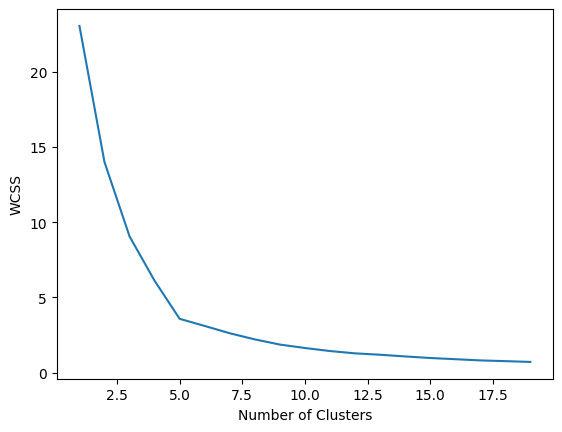

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

##**Conclusion** - Elbow method gives 5 as the optimal value for 'k'

##**K-Means Clustering by taking optimal value of clusters**

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
cluster_labels=km.fit_predict(new_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


##**Visualizing the clusters**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

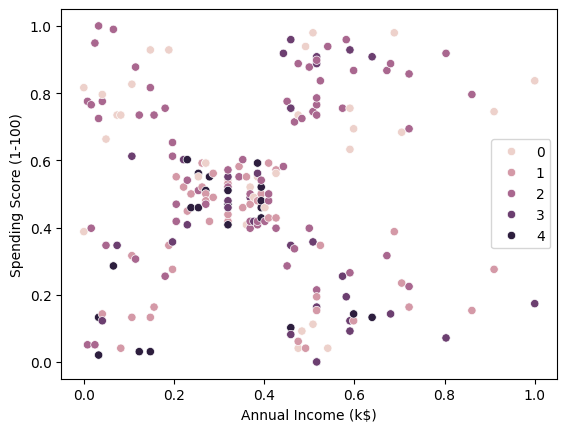

In [ ]:
sns.scatterplot(x=new_x['Annual Income (k$)'], y=new_x['Spending Score (1-100)'], hue=cluster_labels)

##**3D Visualization of clusters**

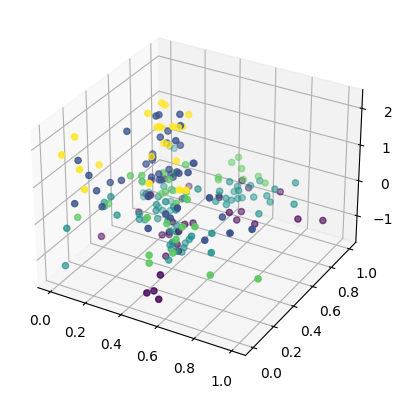

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_x['Annual Income (k$)'], new_x['Spending Score (1-100)'], new_x['Age'], c=cluster_labels)
plt.show()